In [1]:
import os
import json

import pandas as pd
#df = pd.DataFrame(columns=['post', 'bound', 'index', 'label', 'pred', 'epsilon', 'p_safe_attack': 1.0, 'd_safe_attack': True, 'p_safe_bounds' , 'd_safe_bounds', 'beps', 'bdelt', 'balpha', 'iterations_attack', 'iterations_bounds', 'veri_time', 'attk_time'])
rows = []
def load(post, bound):
    entries = []
    path = "ExperimentalLogs/%s_%s.log"%(post, bound)
    with open(path) as log_file:
        for line in log_file:
            #print(json.loads(line))
            entries.append(json.loads(line))
            entry = json.loads(line)
            entry['Posterior'] = post
            entry['Bound'] = bound
            #entry['Method'] = 'Attack'
            #entry['d_safe_bounds'] = abs(entry['d_safe_attack'])
            rows.append(entry)
            #entry2 = json.loads(line)
            #entry2['Posterior'] = post
            #entry2['Bound'] = bound
            #entry2['Method'] = 'Cert'
            #entry2['d_safe_attack'] = abs(entry2['d_safe_bounds'])
            #rows.append(entry2)
    return entries

log_info = load("VOGN", "chernoff")
log_info = load("NA", "chernoff")
log_info = load("SWAG", "chernoff")
log_info = load("BBB", "chernoff")

log_info = load("VOGN", "massart")
log_info = load("NA", "massart")
log_info = load("SWAG", "massart")
log_info = load("BBB", "massart")

In [2]:
df = pd.DataFrame.from_dict(rows, orient='columns')
df.head()

,index,label,pred,epsilon,p_safe_attack,d_safe_attack,p_safe_bounds,d_safe_bounds,beps,bdelt,balpha,iterations_attack,iterations_bounds,veri_time,attk_time,Posterior,Bound
0,41,7.0,7.0,0.05,0.933775,True,0.0,False,0.05,0.1,0.05,151.0,151.0,9.969145,365.658077,VOGN,chernoff
1,51,3.0,3.0,0.05,1.000000,True,0.0,False,0.05,0.1,0.05,151.0,151.0,9.899563,367.314699,VOGN,chernoff
2,21,6.0,6.0,0.05,0.000000,False,0.0,False,0.05,0.1,0.05,151.0,151.0,9.091740,369.528251,VOGN,chernoff
3,11,6.0,6.0,0.05,1.000000,True,0.0,False,0.05,0.1,0.05,151.0,151.0,9.205370,394.377474,VOGN,chernoff
4,61,8.0,8.0,0.05,0.000000,False,0.0,False,0.05,0.1,0.05,151.0,151.0,10.386634,406.907796,VOGN,chernoff


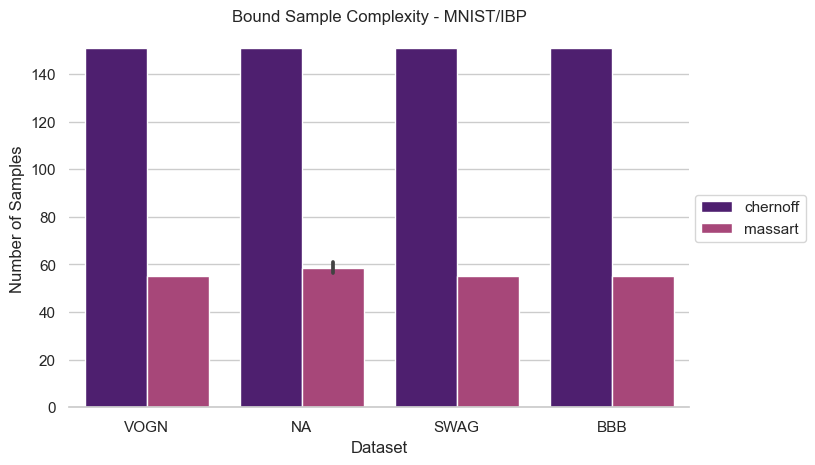

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")
pal = sns.color_palette("magma", 2)

sns.barplot(x="Posterior", y="iterations_bounds", hue="Bound",
                 data=df, palette=pal)

plt.title("Bound Sample Complexity - MNIST/IBP")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")


plt.show()

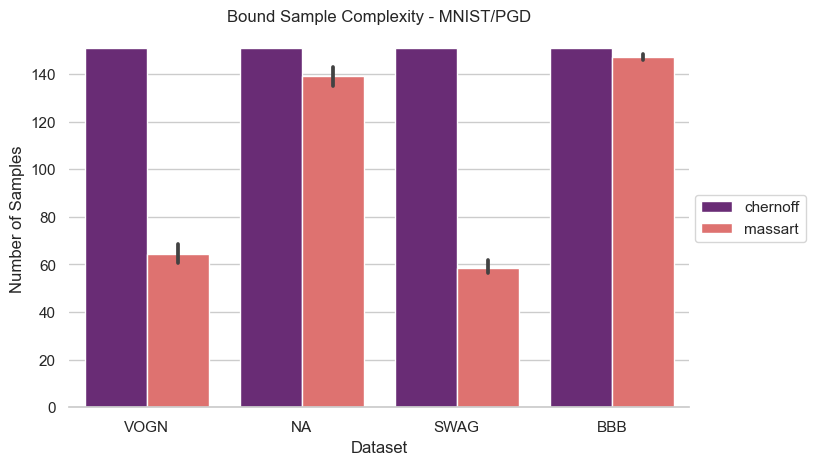

In [19]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

sns.barplot(x="Posterior", y="iterations_attack", hue="Bound",
                 data=df, palette=pal)

plt.title("Bound Sample Complexity - MNIST/PGD")
plt.ylabel("Number of Samples")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()

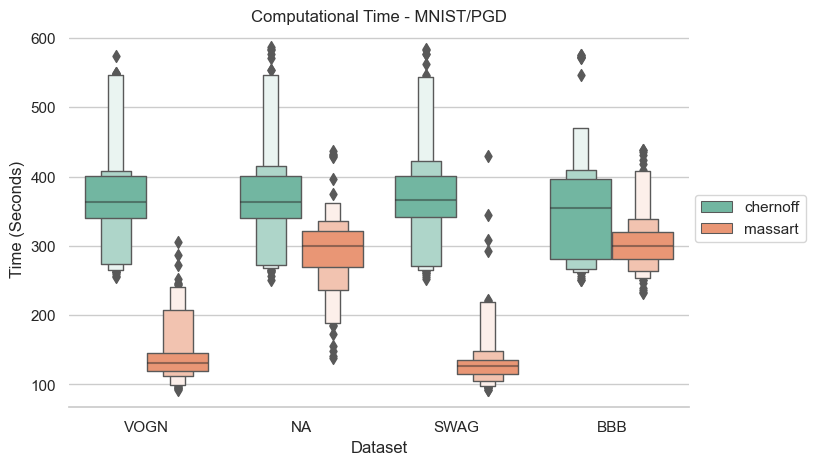

In [5]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.boxenplot(x="Posterior", y="attk_time", hue="Bound",
                 data=df, palette="Set2")

plt.title("Computational Time - MNIST/PGD")
plt.ylabel("Time (Seconds)")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()

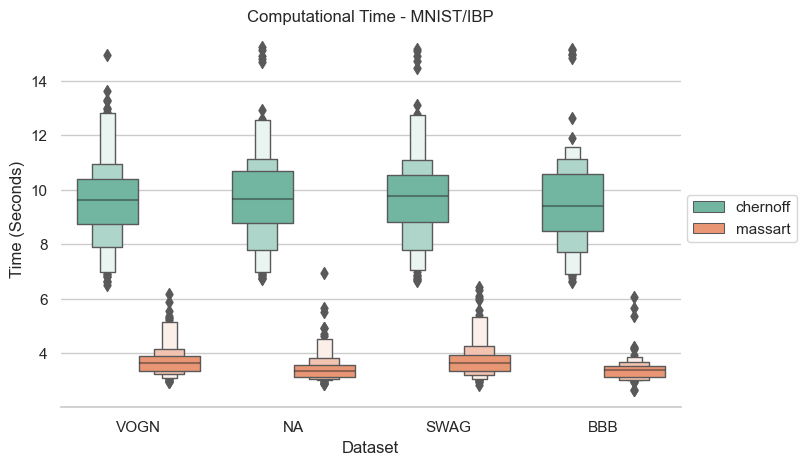

In [6]:
plt.figure(figsize=(8, 5), dpi=100)

sns.set_theme(style="whitegrid")

#sns.boxplot(data=df, x="Posterior", y="d_safe_attack", hue="Method",
#                inner="quart", linewidth=1,
#               palette={"Attack": "b", "Cert": ".85"})


sns.boxenplot(x="Posterior", y="veri_time", hue="Bound",
                 data=df, palette="Set2")

plt.title("Computational Time - MNIST/IBP")
plt.ylabel("Time (Seconds)")
plt.xlabel("Dataset")

sns.despine(left=True)
plt.legend(bbox_to_anchor=(1.2,0.5), loc="center right")
plt.show()